<a href="https://colab.research.google.com/github/niralidbafna/Heart_Disease_Prediction/blob/main/hackathon_nirali_d_bafna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("processed.cleveland.data",names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"])

In [2]:
df['ca'] = pd.to_numeric(df['ca'],errors='coerce')
df['thal'] = pd.to_numeric(df['thal'],errors='coerce')
df['ca'] = pd.to_numeric(df['num'],errors='coerce')

In [3]:
mean_value=df['thal'].mean()
df.fillna(value=mean_value,inplace=True)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

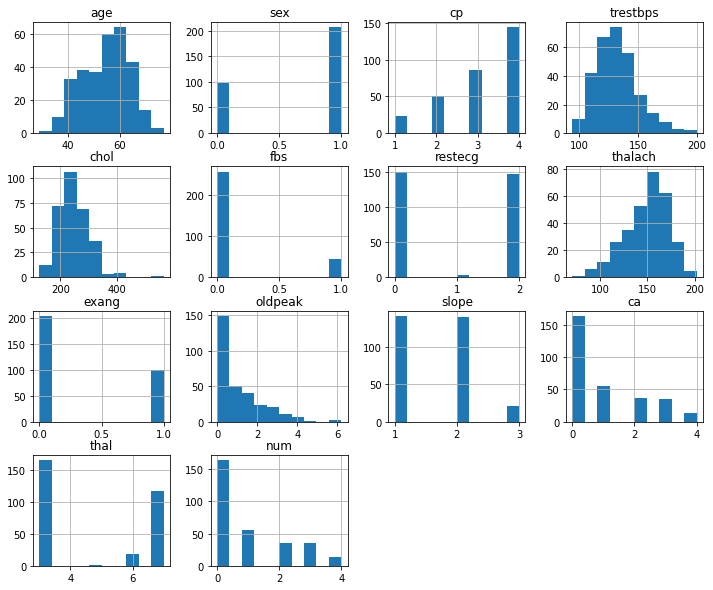

In [5]:
import matplotlib.pyplot as plt
df.hist(figsize=(12,10))
plt.show()

In [7]:
x,y=df.loc[:,:'thal'],df['num']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [13]:
knn_prediction = knn.predict(x_test)

In [17]:
knn_accuracy_model = accuracy_score(y_test,knn_prediction)


In [18]:
knn_accuracy_model*100

48.35164835164835

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [20]:
accuracy_score(knn_prediction,y_test)

0.4835164835164835

In [21]:
confusion_matrix(knn_prediction,y_test)

array([[39,  8, 11,  3,  5],
       [ 5,  1,  2,  7,  2],
       [ 1,  1,  4,  1,  0],
       [ 0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

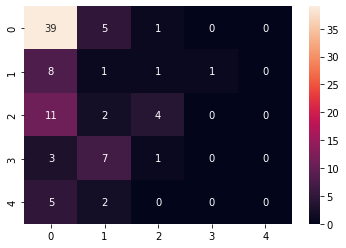

In [23]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,knn_prediction),annot=True)